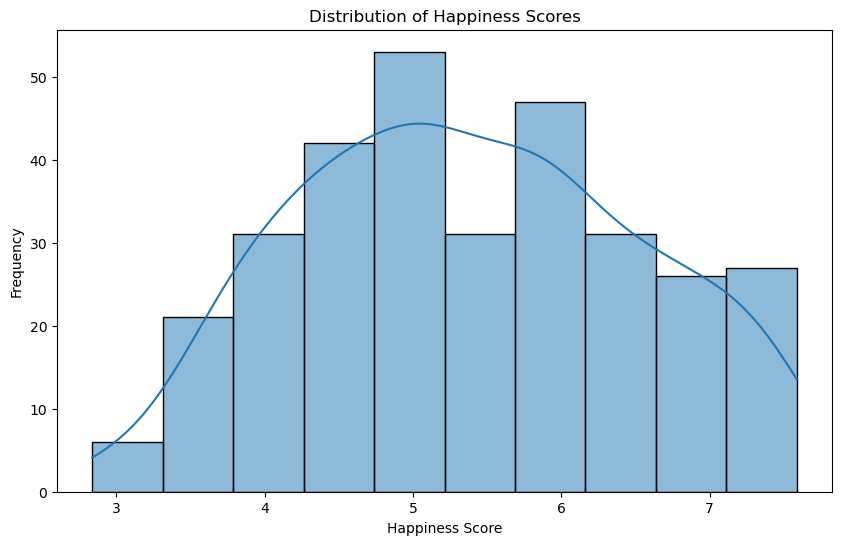

Overall Distribution of Happiness Scores:
Mean: 5.38
Standard Deviation: 1.14
Minimum Score: 2.84
Maximum Score: 7.59

Average Happiness Scores by Country:
Country
Afghanistan    3.4675
Albania        4.8070
Algeria        5.9800
Angola         3.9495
Argentina      6.6120
                ...  
Venezuela      6.4470
Vietnam        5.2105
Yemen          3.9005
Zambia         4.9620
Zimbabwe       4.4015
Name: Happiness Score, Length: 166, dtype: float64

Top 10 countries with the highest average happiness scores:
Country
Switzerland    7.5480
Iceland        7.5310
Denmark        7.5265
Norway         7.5100
Canada         7.4155
Finland        7.4095
Netherlands    7.3585
Sweden         7.3275
New Zealand    7.3100
Australia      7.2985
Name: Happiness Score, dtype: float64


In [7]:
"""Task1:What is the distribution of happiness scores in the dataset? How do the scores vary across different countries?"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data from file(s)
file_names = ["2015.csv","2016.csv","2017.csv","2018.csv","2019.csv"]
data_frames = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    data_frames.append(df)

# Step 2: Combine data from different years into a single DataFrame
combined_df = pd.concat(data_frames)

# Step 3: Calculate the distribution of happiness scores
happiness_scores = combined_df['Happiness Score']
score_mean = happiness_scores.mean()
score_std = happiness_scores.std()
score_min = happiness_scores.min()
score_max = happiness_scores.max()

# Step 4: Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(happiness_scores, kde=True)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()
# Step 5: Calculate the average happiness score for each country
average_scores_by_country = combined_df.groupby('Country')['Happiness Score'].mean()
sorted_countries = average_scores_by_country.sort_values(ascending=False)
top_10_countries = sorted_countries.head(10)
# Print the results
print(f"Overall Distribution of Happiness Scores:")
print(f"Mean: {score_mean:.2f}")
print(f"Standard Deviation: {score_std:.2f}")
print(f"Minimum Score: {score_min:.2f}")
print(f"Maximum Score: {score_max:.2f}")
print("\nAverage Happiness Scores by Country:")
print(average_scores_by_country)
print("\nTop 10 countries with the highest average happiness scores:")
print(top_10_countries)


In [68]:
"""Task2:Which factors are most strongly correlated with the happiness score? Can you calculate the correlation coefficients
between the happiness score and variables such as GDP per capita,social support, life expectancy, freedom, generosity,
and perceptions of corruption?"""

# Ans- for 2015 Factors that is strongly correlated with 'Happiness score' is 'GDP per Capita' with correlation of = 0.78
# for 2016 Happiness score is strongly correlated with GDP per Capita with correlation of = 0.79
#for 2017 Happiness score is strongly correlated with GDP per Capita with correlation of = 0.81
#for 2018 Happiness score is strongly correlated with GDP per Capita with correlation of = 0.80
#for 2019 Happiness score is strongly correlated with GDP per Capita with correlation of = 0.79
import pandas as pd

# Reading the data 
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# Calculating correlation coefficient
correlation1 = df_2015[['Happiness Score', 'Economy (GDP per Capita)',  'Health (Life Expectancy)','Trust (Government Corruption)' ,'Freedom', 'Generosity']].corr()
correlation2 = df_2016[['Happiness Score','Economy (GDP per Capita)',  'Health (Life Expectancy)','Trust (Government Corruption)' ,'Freedom', 'Generosity']].corr()
correlation3 = df_2017[['Happiness.Score','Economy..GDP.per.Capita.','Health..Life.Expectancy.','Freedom','Generosity','Trust..Government.Corruption.']].corr()
correlation4 = df_2018[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()
correlation5 = df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()

# Print the correlation coefficients
print("Correlation for year 2015 \n:" ,correlation1)
print("\nCorrelation for year 2016 \n:" ,correlation2)
print("\nCorrelation for year 2017 \n:" ,correlation3)
print("\nCorrelation for year 2018 \n:" ,correlation4)
print("\nCorrelation for year 2019 \n:" ,correlation5)

Correlation for year 2015 
:                                Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.780966   
Economy (GDP per Capita)              0.780966                  1.000000   
Health (Life Expectancy)              0.724200                  0.816478   
Trust (Government Corruption)         0.395199                  0.307885   
Freedom                               0.568211                  0.370300   
Generosity                            0.180319                 -0.010465   

                               Health (Life Expectancy)  \
Happiness Score                                0.724200   
Economy (GDP per Capita)                       0.816478   
Health (Life Expectancy)                       1.000000   
Trust (Government Corruption)                  0.248335   
Freedom                                        0.360477   
Generosity                                     0.108335   

                        

In [66]:
"""Task3:Are there any outliers in the dataset for variables like GDP per capita or healthy life expectancy?
Can you identify any extreme values and discuss their potential impact on the analysis and model performance?"""

import numpy as np
import pandas as pd
from scipy import stats
data=pd.read_csv('2018.csv')
data2=pd.read_csv('2019.csv')
# Calculate z-scores for GDP per capita and healthy life expectancy
data['GDP_zscore1'] = np.abs(stats.zscore(data['GDP per capita']))
data['Life_exp_zscore1'] = np.abs(stats.zscore(data['Healthy life expectancy']))
data2['GDP_zscore2'] = np.abs(stats.zscore(data2['GDP per capita']))
data2['Life_exp_zscore2'] = np.abs(stats.zscore(data2['Healthy life expectancy']))
threshold = 3
# Identify outliers based on z-scores
outliers_gdp1 = data[data['GDP_zscore1'] > threshold]
outliers_life_exp1 = data[data['Life_exp_zscore1'] > threshold]
outliers_gdp2 = data2[data2['GDP_zscore2'] > threshold]
outliers_life_exp2 = data2[data2['Life_exp_zscore2'] > threshold]
#Data points with a z-score greater than the threshold are considered extreme values.
# Print the outliers
print("Outliers in GDP per capita for 2018:\n")
print(outliers_gdp1)
print("\nOutliers in Healthy life expectancy for 2018:")
print(outliers_life_exp1)
print("\nOutliers in GDP per capita for 2019:\n")
print(outliers_gdp2)
print("\nOutliers in Healthy life expectancy for 2019:")
print(outliers_life_exp2)

"""ANS- Extreme values in GDP per capita  for 2018 is seen and in Healthy life expectancy for 2019.
Outliers can significantly distort descriptive statistics such as the mean and standard deviation""" 



Outliers in GDP per capita for 2018:

    Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  GDP_zscore1  Life_exp_zscore1  
19                        NaN     3.083353          0.294403  

Outliers in Healthy life expectancy for 2018:
Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, GDP_zscore1, Life_exp_zscore1]
Index: []

Outliers in GDP per capita for 2019:

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, GDP_zscore2, Li

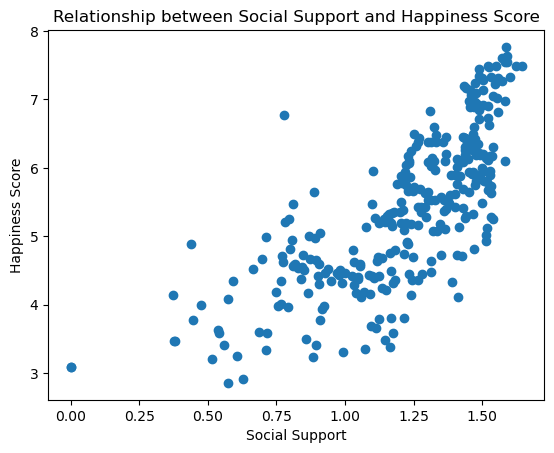

In [24]:
"""Task4:Can you visualize the relationship between social support and the happiness score using a scatter plot?
Does it appear to be a positive or negative relationship?"""

import pandas as pd
import matplotlib.pyplot as plt
# WE HAVE USED DATA OF YEAR 2018 AND 2019 BECAUSE 'SOCIAL SUPPORT' COLUMN DOES NOT EXIST IN OTHER DATASETS.
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df = pd.concat([ df_2018, df_2019])
plt.scatter(df['Social support'], df['Score'])
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Relationship between Social Support and Happiness Score')
plt.show()
# ANS - They appear to be a positive relation as increase in social support has shown increase in Happiness Score.


In [31]:
""" Task5:What is the average level of freedom to make life choices across different countries? Can you calculate the
mean freedom score and identify countries with high and low levels of freedom?"""
import pandas as pd
data_2015=pd.read_csv('2015.csv')
data_2016=pd.read_csv('2016.csv')
data_2017=pd.read_csv('2017.csv')
data_2018=pd.read_csv('2018.csv')
data_2019=pd.read_csv('2019.csv')
mean_freedom_scores1 = data_2015.groupby('Country')['Freedom'].mean()
mean_freedom_scores2 = data_2016.groupby('Country')['Freedom'].mean()
mean_freedom_scores3 = data_2017.groupby('Country')['Freedom'].mean()
mean_freedom_scores4 = data_2018.groupby('Country or region')['Freedom to make life choices'].mean()
mean_freedom_scores5 = data_2019.groupby('Country or region')['Freedom to make life choices'].mean()
sorted_freedom_scores1 = mean_freedom_scores1.sort_values(ascending=False)
sorted_freedom_scores2 = mean_freedom_scores2.sort_values(ascending=False)
sorted_freedom_scores3 = mean_freedom_scores3.sort_values(ascending=False)
sorted_freedom_scores4 = mean_freedom_scores4.sort_values(ascending=False)
sorted_freedom_scores5 = mean_freedom_scores5.sort_values(ascending=False)
print("Countries with high levels of freedom for 2015:")
print(sorted_freedom_scores1.head())
print("\nCountries with low levels of freedom for 2015:")
print(sorted_freedom_scores1.tail())
print("\nCountries with high levels of freedom for 2016:")
print(sorted_freedom_scores2.head())
print("\nCountries with low levels of freedom for 2016:")
print(sorted_freedom_scores2.tail())
print("\nCountries with high levels of freedom for 2017:")
print(sorted_freedom_scores3.head())
print("\nCountries with low levels of freedom for 2017:")
print(sorted_freedom_scores3.tail())
print("\nCountries with high levels of freedom for 2018:")
print(sorted_freedom_scores4.head())
print("\nCountries with low levels of freedom for 2018:")
print(sorted_freedom_scores4.tail())
print("\nCountries with high levels of freedom for 2019:")
print(sorted_freedom_scores5.head())
print("\nCountries with low levels of freedom for 2019:")
print(sorted_freedom_scores5.tail())


Countries with high levels of freedom for 2015:
Country
Norway         0.66973
Switzerland    0.66557
Cambodia       0.66246
Sweden         0.65980
Uzbekistan     0.65821
Name: Freedom, dtype: float64

Countries with low levels of freedom for 2015:
Country
Angola                    0.10384
Sudan                     0.10081
Bosnia and Herzegovina    0.09245
Greece                    0.07699
Iraq                      0.00000
Name: Freedom, dtype: float64

Countries with high levels of freedom for 2016:
Country
Uzbekistan     0.60848
Norway         0.59609
Cambodia       0.58852
Switzerland    0.58557
Sweden         0.58218
Name: Freedom, dtype: float64

Countries with low levels of freedom for 2016:
Country
Syria      0.06912
Greece     0.05822
Burundi    0.04320
Angola     0.00589
Sudan      0.00000
Name: Freedom, dtype: float64

Countries with high levels of freedom for 2017:
Country
Uzbekistan    0.658249
Norway        0.635423
Cambodia      0.633376
Iceland       0.627163
Denmark    

In [23]:
"""Task :Perform following steps on the same dataset which you used for EDA.
Data Preprocessing (as per requirement), Feature Engineering, Split dataset in train-test (80:20 ratio),
Model selection, Model training, Model evaluation, Fine-tune the Model, Make predictions """
# WORLD HAPPINESS PREDICTION ANALYSIS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('2015.csv')

# Data Preprocessing
df_encoded = pd.get_dummies(df, columns=['Country', 'Region'])

# Split the dataset into train and test sets (80:20 ratio)
X = df_encoded.drop(['Happiness Score'], axis=1)  # Features
y = df_encoded['Happiness Score']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Fine-Tune Model
param_grid = {
    'linearregression__fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Model selection
best_model = grid_search.best_estimator_

# Model evaluation
train_preds = best_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
print(f"Train RMSE: {train_rmse:.4f}")

test_preds = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
print(f"Test RMSE: {test_rmse:.4f}")

new_data = pd.read_csv('2015.csv')  # Provide new data for prediction
new_data_encoded = pd.get_dummies(new_data, columns=['Country', 'Region'])
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)
predictions = best_model.predict(new_data_encoded)
# Print the predictions
print(predictions)
# SIMILARLY WE CAN DO ANALYSIS FOR EACH YEAR.


Train RMSE: 0.0000
Test RMSE: 0.2054
[7.587      7.561      7.527      7.522      7.427      7.406
 7.378      7.364      7.286      7.13574363 7.278      7.226
 6.96654013 7.187      7.119      6.53660039 6.946      6.94
 6.71611247 6.61810926 6.867      6.853      6.81       6.798
 6.50417736 6.75       6.67       6.611      6.575      6.2489848
 6.18255692 6.32840229 6.477      6.455      6.411      6.329
 6.302      6.298      6.295      6.269      6.168      6.13
 6.123      6.003      5.995      5.85863424 5.984      5.975
 5.96       5.948      5.89       5.57148552 5.878      5.855
 5.848      5.833      5.88281808 5.824      5.813      5.791
 5.77       5.759      5.754      5.716      5.709      5.82169375
 5.689      5.605      5.589      5.49012369 5.477      5.474
 5.429      5.399      5.36       5.09106946 5.286      5.268
 5.253      5.212      5.194      5.18379476 5.192      5.14
 5.129      5.124      5.123      5.102      5.098      5.073
 5.2164671  5.013      5.00